# Analyse spectrale d'un signal
_Méthodes numériques_

Dans cette séance, vous allez apprendre à :
* Utiliser les objets Python comme les vecteurs numpy
* Créer une fonction qui construit numériquement l'allure d'un signal temporel à partir de son spectre.
* Obtenir le spectre d'un signal grâce à des fonctions natives de la bibliothèques `numpy.fft`

## Position du problème

### Eléments théoriques
On rappelle que le __spectre__ d'un signal est sa décomposition en somme de sinusoïdes où l'on donne : la _fréquence_ ($f_i$), l'_amplitude_ $(A_i)$ et la _phase à l'origine_ ($\phi_i$) de chaque sinusoïde de la décomposition :

$$
s(t) = \sum_{i} A_i \cos \left ( 2 \pi f_i t + \phi_i \right )
$$

_Pour rappel, pour les signaux périodiques, la somme est infinie et les fréquences $f_i$ sont des multiples de la fréquence $f$ du signal._

### Réflexions préliminéaires

__But :__ On veut pouvoir représenter un signal de deux manières :
* son allure temporelle représentée mathématiquement par la fonction $x(t)$ évaluée sur un intervalle $[t_1, t_2]$
* son spectre représenté par l'ensemble des triplets $(f_i, A_i, \phi_i)$ de sa décomposition

__Travail (5/10minutes) :__ Réfléchir au(x) type(s) de variable(s) qui permettent, sous `Python` de stocker la représentation de l'allure temporelle (l'intervalle $[t_1, t_2]$ et les valeurs de x sur cet intervalle) et à leur structure puis au(x) type(s) de variable(s) qui permettent de stocker la représentation du spectre d'un signal _(on supposera la somme finie, quitte à limiter la somme à N fréquences dans le cas de sommes infinies)_.

__Après avoir réfléchi à la question précédente__, passer à la suite qui propose une représentation temporelle et fréquentielle sous Python.

### Représentation des signaux

#### Représentation temporelle
Dans un calcul numérique, l'évaluation de la fonction (pour sont tracé par exemple) ne peut être fait que pour des __valeurs discrètes__. On va donc définir pour un signal $s(t)$ dont on connaît la fonction temporelle $s$ :
1. Une fonction qui associe à une valeur de temps $t_i$ la valeur calculée $s(t_i)$.
2. Un vecteur numpy contenant des valeurs d'abscisses temporelles $t_k$ régulièrement réparties entre deux valeurs choisies $t_1$ et $t_2$ et de longueur $N$.
3. Un vecteur numpy contenant les valeurs du signal $s_k$ aux instants $t_k$ : $s_k = s(t_k)$.

On pourra alors tracer le signal temporel ou obtenir son spectre grâce aux fonctions natives de `numpy.fft`

#### Représentation fréquentielle.
Il y a une série de trois grandeurs, on va donc représenter le spectre d'un signal par trois vecteurs :
* un contenant les fréquences $f_i$ de la décomposition
* un contenant les amplitudes $A_i$ de la décomposition
* un contenant les phases à l'origine $\phi_i$ de la décomposition

On pourra alors reconstruire la fonction $s(t)$ comme donnée précédemment et ainsi visualiser son allure temporelle. On pourra aussi représenter le spectre du signal.

On réfléchira aux listes des m premiers éléments des décompositions spectrales des signaux créneaux et triangulaires (de fréquence $f_0$) données ci-dessous :

$$
s_{creneau} = \sum_{k=1}^{m} {4 \over \pi (2k + 1)}\ \sin \left ( 2 \pi (2k + 1) f_0 t \right)
$$

$$
s_{triangle} = \sum_{k=1}^{m} {{(-1)}^k 8 \over {\left (\pi (2k + 1)\right)}^2}\ \sin \left ( 2 \pi (2k + 1) f_0 t \right)
$$

## Exercice 1 : Du spectre à la représentation temporelle.

Dans la cellule de code suivante, vous devez :
> 1. Ecrire une fonction `fonc_temp` qui prend 4 arguments : 1 flottant `t` et 3 vecteurs numpy `fs`, `amps`, `phis` (liste des fréquences amplitudes et phases à l'origine du spectre) et qui renvoie la valeur de `s` définie dans les Eléments théoriques (plus haut) évaluée à l'instant `t`. Cette fonction devra être vectorialisable.
> 2. Ecrire une fonction `evalue_temp` qui prend comme arguments : 3 vecteurs numpy `fs`, `amps`, `phis`, 2 flottants `t1`, `t2` et un entier `N` et qui renvoie deux vecteurs numpy:
>    1. un vecteur contenant `N` valeurs de temps `t_k` régulièrement réparties entre `t1` et `t2`
>    2. un vecteur contenant les valeurs `s_k` qui sont les évaluatinos de `s` (définie dans les Eléments théoriques) aux instants `t_k`
> 3. Ecrire une fonction `trace_spec` qui prend comme arguments 3 vecteurs numpy `fs`, `amps`, `phis` et qui trace le spectre du signal.
> 4. Ecrire une fonction `trace_temp` qui prend comme arguments : 3 vecteurs numpy `fs`, `amps`, `phis`, 2 flottants `t1`, `t2` et un entier `N` et qui trace l'allure temporelle de `s` entre `t_1` et `t_2` en évaluant `N` valeurs de temps.
> 5. Utiliser les fonctions précédentes pour tracer le spectre puis l'allure temporelle d'un signal créneau et d'un signal triangle à partir des $m$ premières composantes spectrales de leur décomposition (m = 10) pour un fondamental à $f_0 = 1kHz$. On discutera de la validité d'approximer les signaux créneaux et triangle par leurs 10 premières composantes.

_Quelques indications utiles :_
* Si une fonction retourne deux éléments (ex : return x, y) alors pour récuperer les __deux__ variables lors de l'appel de la fonction, on écrira `x0, y0 = fonction_appelee(...)`
* _Pour le tracé des spectres_ : La fonction `bar(x, y, width, ...)` de `matplotlib.pyplot` fonctionne comme `plot` (mêmes options) mais trace des barres au lieu de points. L'argument `width` défini la largeur des barres, on prendra `100` (l'unité est en Hertz).

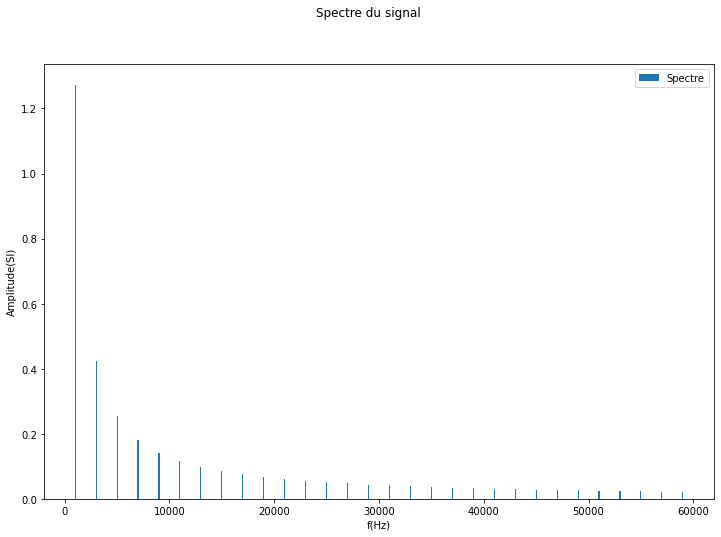

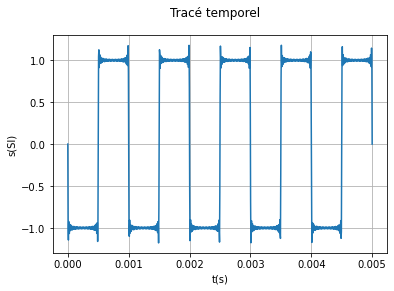

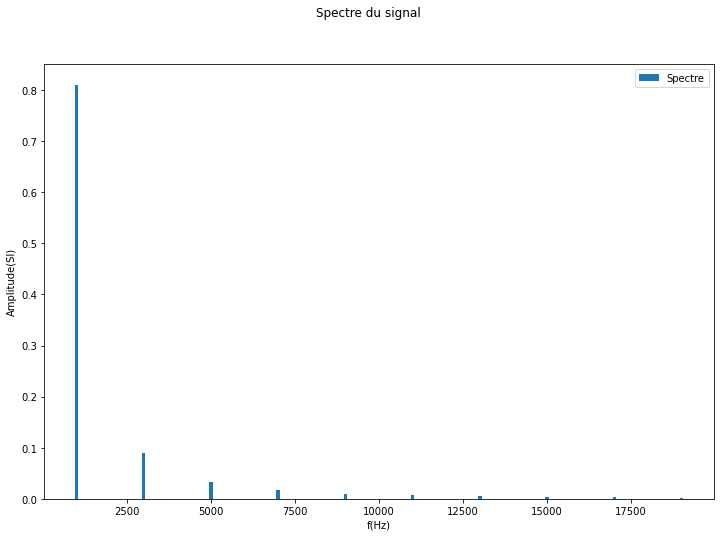

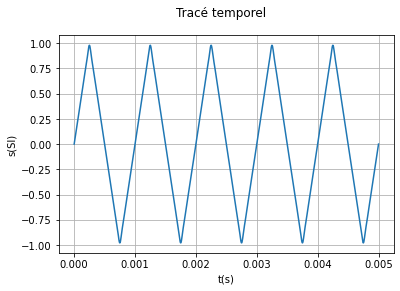

In [1]:
"""Quelques indications :
- N'oubliez d'importer les bibliothèques scientifiques
- Pensez à utiliser les fonctions précédentes au lieu de tout réécrire.
- Pensez aux fonctions numpy pour créer simplement des vecteurs.
- Attention aux phases, les expressions sont avec des sinus !
"""
import matplotlib.pyplot as plt
import numpy as np


def fonc_temp(t, fs, amps, phis):
    n = len(fs)  # Nombre de composantes spectrales
    s = 0  # Initialisation de la valeur du signal
    for i in range(n):  # On va parcourir les composantes
        s += amps[i] * np.cos(2 * np.pi * fs[i] * t + phis[i])  # On ajoute la composante spectrale
    return s



def evalue_temp(fs, amps, phis, t1, t2, N):
    ts = np.linspace(t1, t2, N)  # Création du vecteur temps
    return ts, fonc_temp(ts, fs, amps, phis)  # Les opérations de evalue_temp sont toutes vectorialisables


def trace_spec(fs, amps, phis):
    f, ax = plt.subplots(figsize = (12, 8))  # Création de la figure
    f.suptitle("Spectre du signal")  # Titre
    ax.set_xlabel("f(Hz)")  # Légende des x
    ax.set_ylabel("Amplitude(SI)")  # Légende des y
    ax.bar(fs, amps, width=100, label="Spectre")  # Tracé du spectre
    ax.legend()
    return f, ax  # On pourrait mettre plt.show() dans la fonction, on va plutôt enregistrer la figure pour l'afficher plus tard


def trace_temp(fs, amps, phis, t1, t2, N):
    ts, st = evalue_temp(fs, amps, phis, t1, t2, N)
    f, ax = plt.subplots()  # Création de la figure
    f.suptitle("Tracé temporel")  # Titre
    ax.set_xlabel("t(s)")  # Légende des x
    ax.set_ylabel("s(SI)")  # Légende des y
    ax.plot(ts, st, label="s(t)")  # Tracé temporel
    return f, ax  # On pourrait mettre plt.show() dans la fonction, on va plutôt enregistrer la figure pour l'afficher plus tard


"""Cas du créneau"""
f0 = 1000  # Fondamental
m = 30  # Nombre de composantes
fs = (2 * np.arange(m) + 1) * f0  # Fréquence
amps = 4 / (np.pi * (2 * np.arange(m) + 1))  # Amplitudes
phis = np.ones(m) * (np.pi / 2)  # Phases


t1 = 0
t2 = 5 / f0
N = 1000
f1, ax1 = trace_spec(fs, amps, phis)
f2, ax2 = trace_temp(fs, amps, phis, t1, t2, N)
ax2.grid()
plt.show()

"""Cas du triangle"""
f0 = 1000  # Fondamental
m = 10  # Nombre de composantes
fs = (2 * np.arange(m) + 1) * f0  # Fréquence
amps = 8 / ((np.pi * (2 * np.arange(m) + 1)) ** 2)  # Amplitudes
phis = np.array([-np.pi / 2, np.pi / 2] * 5)  # Phases (on tient compte du (-1)^k)


t1 = 0
t2 = 5 / f0
N = 1000
f1, ax1 = trace_spec(fs, amps, phis)
f2, ax2 = trace_temp(fs, amps, phis, t1, t2, N)
ax2.grid()
plt.show()

## Exercice 2 : Du tracé temporelle au spectre
On suppose qu'on dispose de `N` mesures d'un signal $s$ faites avec une fréquence d'échantillonnage `fe`. Ces valeurs sont stockées dans un vecteur numpy `sk`. On veut obtenir la transformée de Fourier du signal $s$ basé sur les mesures `sk`.

Nous allons utiliser la fonction native `fft` de la bibliothèque `numpy.fft`.
* `fft(sk) / N` permet de calculer la TF à partir de `sk` pour une liste de valeurs de fréquences discrètes `f_i`. La fonction renvoie les amplitudes sous formes de grandeurs complexes :
    * Le module est l'amplitude de la composante spectrale
    * son argument est la phase à l'origine du signal.

Les valeurs `f_i` auxquelles le spectre est évalué sont données par la liste suivante :

$$
[0, 1, ..., n] \times {fe \over N}
$$

Vous devez :
> 1. Ecrire une fonction `eval_fft` qui prend comme argument un vecteur numpy `sk` et une fréquence d'échantilonnage `fr` et qui renvoie :
>    1. une liste numpy contenant les fréquences $f_i$
>    2. une liste numpy contenant les amplitudes associées à chaque composante spectrale de la TF de `sk`
>    3. une liste numpy contenant les phases à l'origine associées à chaque composante spectrale de la TF de `sk`
> 2. Créer des vecteurs de taille $N = 100$ simulant la mesure (parfaite !) d'un signal (prendre à chaque fois des amplitudes égales à $1 SI$) :
>    1. sinusoïdal de fréquence 2kHz (réfléchir aux choix de la fréquence d'échantillonnage) et de valeur moyenne $1 SI$
>    1. produit de deux sinusoïdes de fréquences 100Hz et 1kHz.
>    1. créneau de fréquence 2kHz (réfléchir aux choix de la fréquence d'échantillonnage)
> 3. Obtenir puis tracer le spectre pour chacun des signaux précédents. Commenter ce qu'on observe. On parlera en TP de __repli spectral__. En pratique, on ne peut mesurer une fréquence supérieure à $f_e/2$, c'est le __critère de Shannon-Nyquist__. Modifier la fonction `eval_fft` pour ne renvoyer les fréquences ainsi que les amplitudes et phases que jusqu'à $f_e/2$.
> 4. Reconstruire le signal à partir des spectres obtenues et les tracer. On représente sur le même graphique, le signal acquis pour comparaison avec le signal reconstruit.

_Données utiles_ :
* Les fonctions `abs` et `angle` de la bibliothèque `numpy` permettent de calculer respectivement le module et l'argument d'un complexe et peuvent s'appliquer sur un vecteur entier.
* Plusieurs fonctions ont déjà été créés, ce n'est pas la peine de les réécrire.

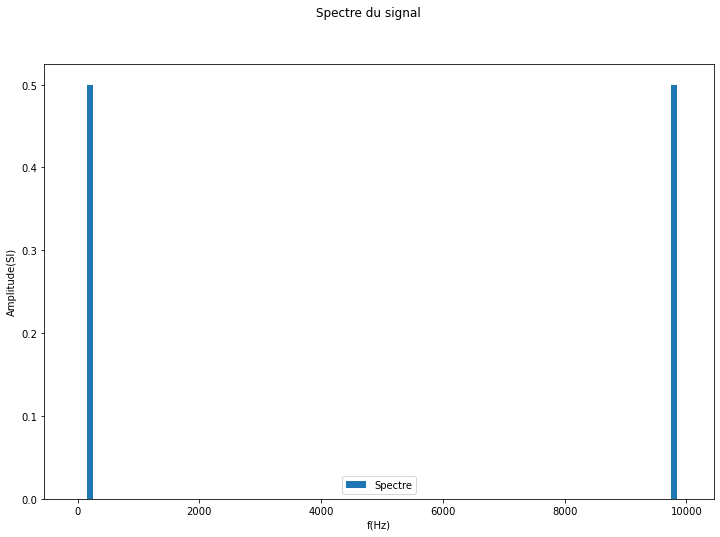

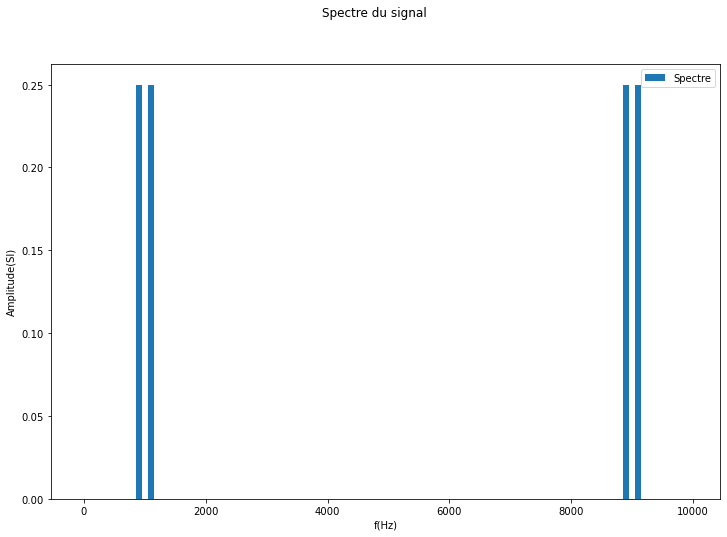

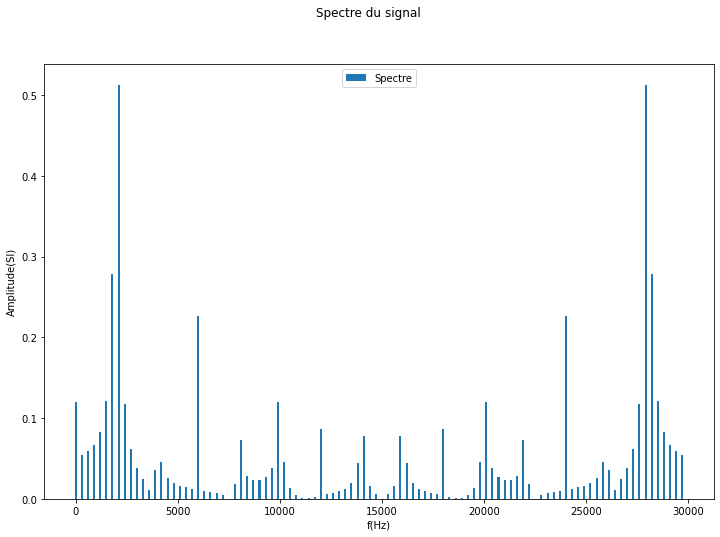

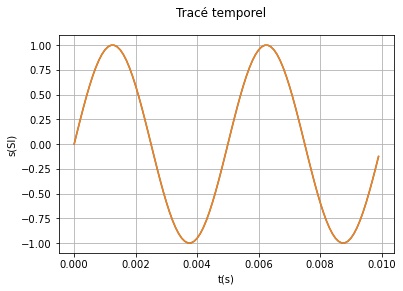

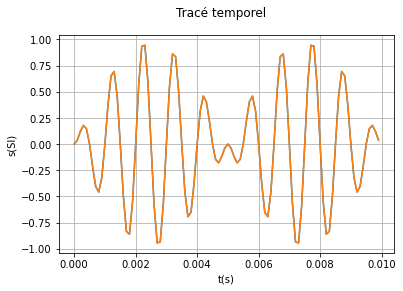

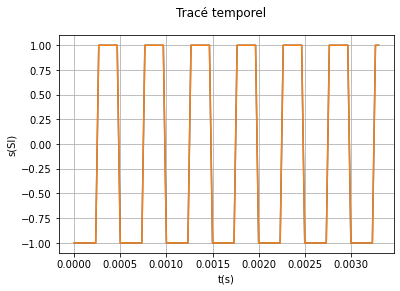

In [2]:
"""On importe pour vous la fonction fft"""
from numpy.fft import fft  # Avec cette méthode d'importation, vous pouver utiliser directement la syntaxe fft(...)


def eval_fft(s, fe):
    n = len(s)  # Taille de s pour le vecteur des fréquences
    freqs = np.arange(N) * fe / N  # Liste de fréquence
    sk = fft(s) / n  # Calcul de la TF
    return freqs, np.abs(sk), np.angle(sk)


N = 100
fe = 10000  # On prend un fréquence de 10kHz pour le sinus et le signal modulé (au moins 5 points par période).
tk = np.arange(N) * 1 / fe
s_sin = np.sin(2 * np.pi * 200 * tk)  # Signal sinusoïdal
s_mod = np.sin(2 * np.pi * 100 * tk) * np.sin(2 * np.pi * 1000 * tk)  # Signal produit de sinus

s_cre = np.zeros(N)  # On va devoir remplir s_cre dans une boucle à cause de la condition
f = 2000  # fréquence
fe2 = 30000  # Le contenue fréquentiel d'un créneau est plus important.
for i in range(N):
    t = i / fe2  # temps
    n_per = int(t / (1 / (2 * f)))  # Nombre de demies-période entières entre 0 et t.
    if n_per % 2 == 1:  # Nombre pair de demi-période
        s_cre[i] = 1
    else:
        s_cre[i] = - 1
tk2 = np.arange(N) * 1 / fe2
        
freqs_sin, amps_sin, phis_sin = eval_fft(s_sin, fe)  # Calcul de la TF
freqs_mod, amps_mod, phis_mod = eval_fft(s_mod, fe)  # Calcul de la TF
freqs_cre, amps_cre, phis_cre = eval_fft(s_cre, fe2)  # Calcul de la TF

f1, ax1 = trace_spec(freqs_sin, amps_sin, phis_sin)  # Tracé du spectre
f2, ax2 = trace_spec(freqs_mod, amps_mod, phis_mod)  # Tracé du spectre
f3, ax3 = trace_spec(freqs_cre, amps_cre, phis_cre)  # Tracé du spectre

t1 = 0
t2 = max(tk)
t22 = max(tk2)
f4, ax4 = trace_temp(freqs_sin, amps_sin, phis_sin, t1, t2, N)
ax4.plot(tk, s_sin)  # Pour comparaison
ax4.grid()
f5, ax5 = trace_temp(freqs_mod, amps_mod, phis_mod, t1, t2, N)
ax5.plot(tk, s_mod)  # Pour comparaison
ax5.grid()
f6, ax6 = trace_temp(freqs_cre, amps_cre, phis_cre, t1, t22, N)
ax6.plot(tk2, s_cre)  # Pour comparaison
ax6.grid()

plt.show()

__Il est important de conserver votre travail et de mettre au propre les fonctions que vous avez créées, nous les utiliserons pour d'autre TD sur les capacités numériques plus tard.__

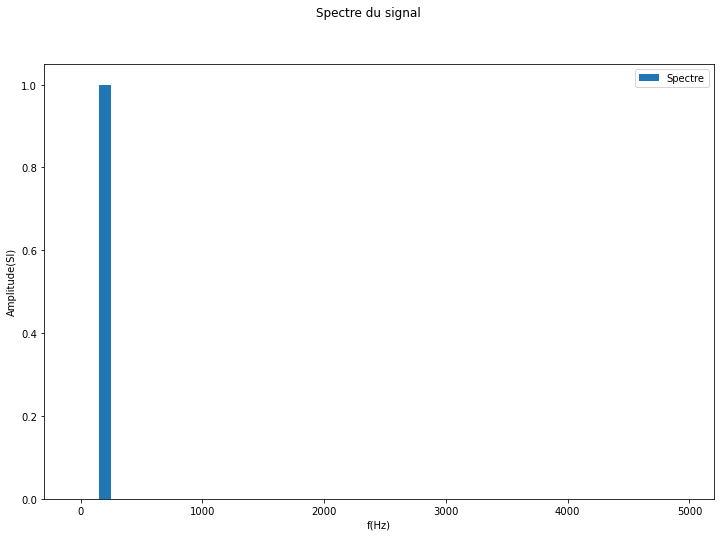

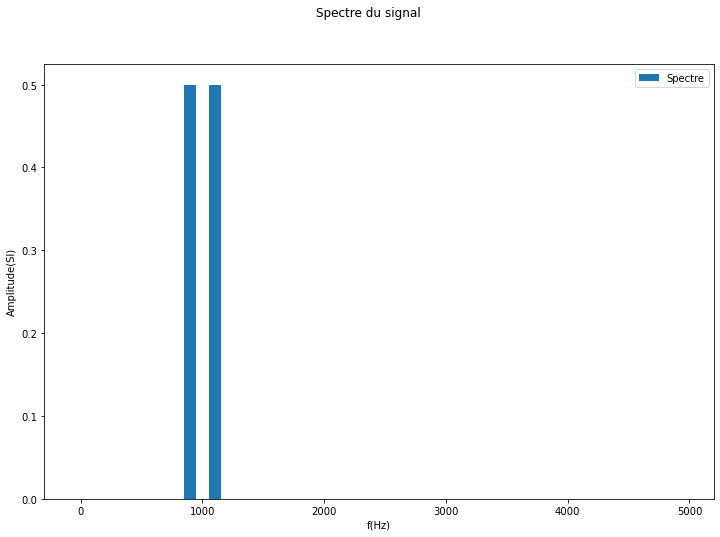

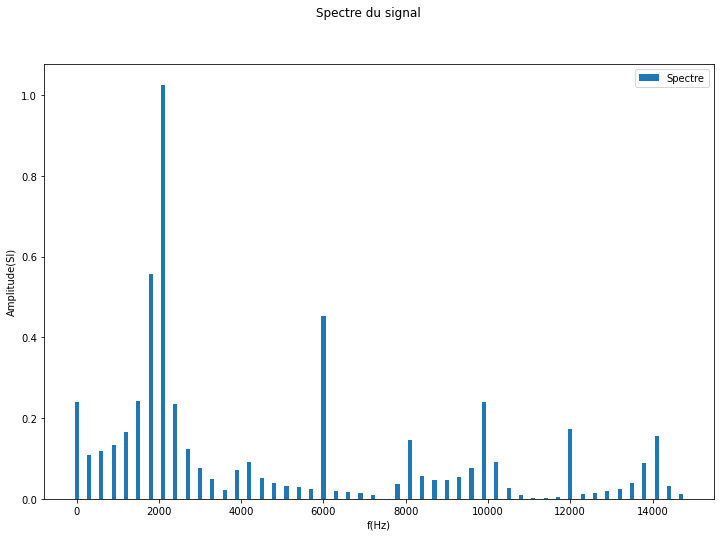

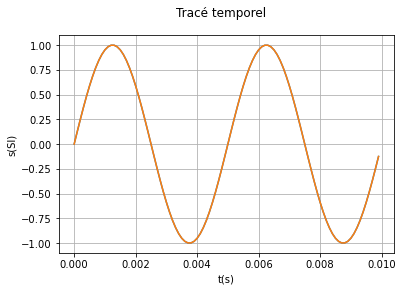

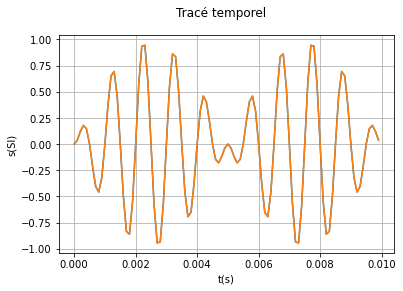

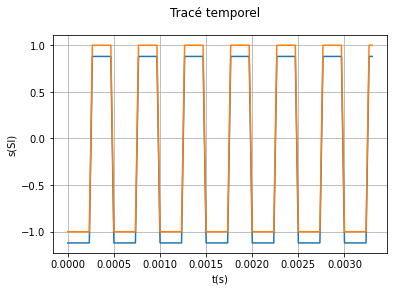

In [3]:
"""Version corrigé pour ne prendre que les fréquences jusqu'à fe/2
On doit par contre multiplier par 2 les amplitudes.
"""
"""On importe pour vous la fonction fft"""


def eval_fft(s, fe):
    n = len(s)  # Taille de s pour le vecteur des fréquences
    freqs = np.arange(int(N / 2)) * fe / N  # Liste de fréquence
    sk = fft(s) / n  # Calcul de la TF
    return freqs, np.abs(sk)[:int(N/2)] * 2, np.angle(sk)[:int(N/2)]  # Remarquez la multiplication par 2


N = 100
fe = 10000  # On prend un fréquence de 10kHz pour le sinus et le signal modulé (au moins 5 points par période).
tk = np.arange(N) * 1 / fe
s_sin = np.sin(2 * np.pi * 200 * tk)  # Signal sinusoïdal
s_mod = np.sin(2 * np.pi * 100 * tk) * np.sin(2 * np.pi * 1000 * tk)  # Signal produit de sinus

s_cre = np.zeros(N)  # On va devoir remplir s_cre dans une boucle à cause de la condition
f = 2000  # fréquence
fe2 = 30000  # Le contenue fréquentiel d'un créneau est plus important.
for i in range(N):
    t = i / fe2  # temps
    n_per = int(t / (1 / (2 * f)))  # Nombre de demies-période entières entre 0 et t.
    if n_per % 2 == 1:  # Nombre pair de demi-période
        s_cre[i] = 1
    else:
        s_cre[i] = - 1
tk2 = np.arange(N) * 1 / fe2
        
freqs_sin, amps_sin, phis_sin = eval_fft(s_sin, fe)  # Calcul de la TF
freqs_mod, amps_mod, phis_mod = eval_fft(s_mod, fe)  # Calcul de la TF
freqs_cre, amps_cre, phis_cre = eval_fft(s_cre, fe2)  # Calcul de la TF

f1, ax1 = trace_spec(freqs_sin, amps_sin, phis_sin)  # Tracé du spectre
f2, ax2 = trace_spec(freqs_mod, amps_mod, phis_mod)  # Tracé du spectre
f3, ax3 = trace_spec(freqs_cre, amps_cre, phis_cre)  # Tracé du spectre

t1 = 0
t2 = max(tk)
t22 = max(tk2)
f4, ax4 = trace_temp(freqs_sin, amps_sin, phis_sin, t1, t2, N)
ax4.plot(tk, s_sin)  # Pour comparaison
ax4.grid()
f5, ax5 = trace_temp(freqs_mod, amps_mod, phis_mod, t1, t2, N)
ax5.plot(tk, s_mod)  # Pour comparaison
ax5.grid()
f6, ax6 = trace_temp(freqs_cre, amps_cre, phis_cre, t1, t22, N)
ax6.plot(tk2, s_cre)  # Pour comparaison
ax6.grid()

plt.show()

On remarque un problème avec le créneau. C'est parce que des fréquences supérieures à $f_e /2$ existent et ont été repliées. On observe ainsi une fréquence à 12kHz qui ne devrait pas exister ($f_{repli} = f_e - f_n = 12kHz$ pour la composante $f_n = 16kHz$).

Le problème est que dans le cas du créneaux, l'amplitude des composantes spectrales diminue lentement : les cinquième composante $f_n = 16kHz$) est encore non négligeable. Son "repli" ($f_{repli} = 12kHz$) modifie le spectre du créneau, d'où la reconstruction fausse.

### Quelques explications sur le repli spectral.

On rappelle que le signal acquis est échantillonné à une fréquence $f_e$. On a donc uniquement accès à une série de points de mesures $(t_k, s_k)$. On donne la représentation de ces points (simulation!) ci-dessous pour un signal sinusoïdal de 200Hz.

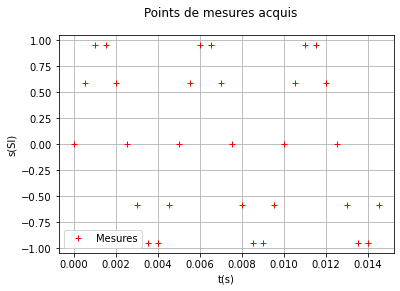

In [4]:
fe = 2000  # Fréquence d'échantillonnage de 2kHz
Te = 1/fe  # Période d'échantillonnage
fsig = 200  # Fréquence du signal
Tsig = 1/fsig  # Période du signal
t = np.arange(0, 3 * Tsig, Te)  # Temps des points de mesure
s = np.sin(2 * np.pi * fsig * t)  # Valeur acquises pour le signal

f, ax = plt.subplots()
f.suptitle("Points de mesures acquis")
ax.set_xlabel("t(s)")
ax.set_ylabel("s(SI)")
ax.plot(t, s, marker='+', linestyle='', color='red', label="Mesures")  # On ne relie pas les points pour bien montrer où sont les mesures.
ax.legend()
ax.grid()
plt.show()


On reconnaît bien l'allure d'un sinusoïde et si l'on essaie de mesurer sa période, on trouve bien $T = 5\times10^{-3} s$.

MAIS, c'est point pourrait correspondre aussi __à un autre signal sinusoïdal__ : un signal de fréquence $f_r = f_e - f_{sig} = 1800Hz$ mais de phase à l'origine égale à $\pi$ (ce qui revient à multiplier le signal par $-1$).

Pour s'en convaindre, on va tracer un tel signal avec les points de mesures.

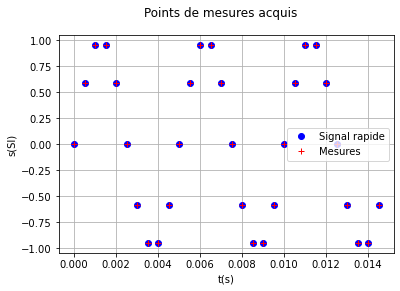

In [5]:
fr = 1800
Tr = 1 / fr
sr = -np.sin(2 * np.pi * fr * t)  # Multiplication par -1



f, ax = plt.subplots()
f.suptitle("Points de mesures acquis")
ax.set_xlabel("t(s)")
ax.set_ylabel("s(SI)")
ax.plot(t, sr, marker='o', linestyle='', color='blue', label="Signal rapide")
ax.plot(t, s, marker='+', linestyle='', color='red', label="Mesures")  # On ne relie pas les points pour bien montrer où sont les mesures.

ax.legend()
ax.grid()
plt.show()

Les points coïncident ! Pour bien se rendre compte que les points bleus correspondent à un signal de 1800Hz, on va retracer ce signal mais une fréquence d'échantillonnage beaucoup plus grande pour bien voir les variations rapides.

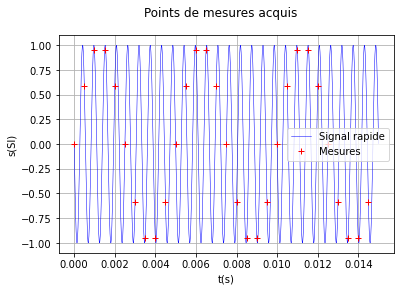

In [6]:
t2 = np.arange(0, 3 * Tsig, Te / 1000)  # 1000 fois plus de points
sr2 = -np.sin(2 * np.pi * fr * t2)  # Multiplication par -1



f, ax = plt.subplots()
f.suptitle("Points de mesures acquis")
ax.set_xlabel("t(s)")
ax.set_ylabel("s(SI)")
ax.plot(t2, sr2, linestyle='-', color='blue', linewidth=0.5, label="Signal rapide")
ax.plot(t, s, marker='+', linestyle='', color='red', label="Mesures")  # On ne relie pas les points pour bien montrer où sont les mesures.

ax.legend()
ax.grid()
plt.show()

Le signal passent effectivement par les points de mesures, il est donc compatible avec ces points. Quand le fonction `fft` calcule les fréquences du spectre du signal $(t_k, s_k)$ pour des fréquences entre 0 et $f_e$, il trouve donc normalement __deux fréquences__ : $f_{sig}$ et $f_{repli}$.

_C'est pourquoi on n'étudie que les fréquences inférieures à $f_e / 2$.  
MAIS le problème du repli spectral apparaît quand des fréquences du signal sont supérieure à $f_e / 2$ qui font apparaître des fréquences repliées inférieures._

### SOLUTION : Le critère de Shannon-Nyquist

__Lorsqu'on analyse un signal dont le contenu spectral va jusqu'à une fréquence $f_{max}$, on doit échantillonner le signal à une fréquence $f_e$ telle que $f_e / 2 > f_{max}$.__

Exemple :  Dans le cas du signal créneau, la fréquence maximale est évidemment infinie mais on a vu qu'on pouvait se contenter des 10 premières composantes, soit pour un signal de 2kHz, une fréquence maximale de $38kHz$ (on prendra 40kHz$ pour avoir une marge). Soit une fréquence d'échantillonnage de 80kHz.

On refait une simulation ci-dessous pour le créneau en prenant une fréquence d'échantillonnage de 80kHz.

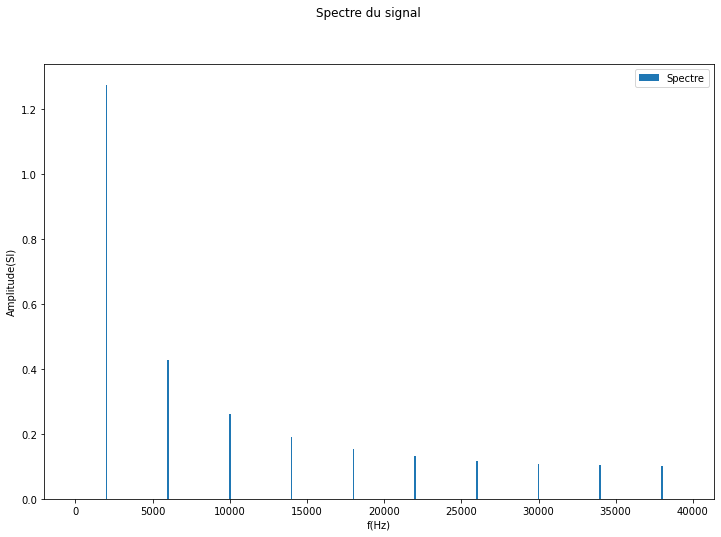

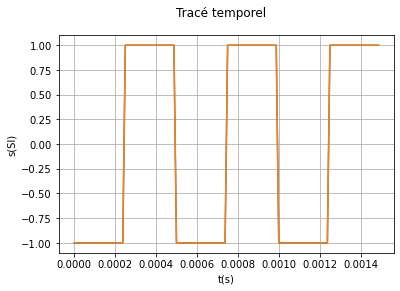

In [7]:
f = 2000  # fréquence du créneau
fe2 = 80000  # Fréquence d'échantillonnage
Tobs = 3 / f  # Temps d'observation : 3 périodes
N = int(fe2 * Tobs)  # Nombre de points de mesure

s_cre = np.zeros(N)  # On va devoir remplir s_cre dans une boucle à cause de la condition
for i in range(N):
    t = i / fe2  # temps
    n_per = int(t / (1 / (2 * f)))  # Nombre de demies-période entières entre 0 et t.
    if n_per % 2 == 1:  # Nombre pair de demi-période
        s_cre[i] = 1
    else:
        s_cre[i] = - 1
tk2 = np.arange(N) * 1 / fe2
        
freqs_cre, amps_cre, phis_cre = eval_fft(s_cre, fe2)  # Calcul de la TF

f3, ax3 = trace_spec(freqs_cre, amps_cre, phis_cre)  # Tracé du spectre

t1 = 0
t22 = max(tk2)
f6, ax6 = trace_temp(freqs_cre, amps_cre, phis_cre, t1, t22, N)
ax6.plot(tk2, s_cre)  # Pour comparaison
ax6.grid()

plt.show()

Cette fois le repi spectral ne pose pas de problème car les fréquences repliées sont d'amplitude négligeable.